In [1]:
# !pip install --user pandas numpy scipy matplotlib
# !pip install --user xlsxwriter pyBigWig wrapt decorator
import synotil as synotil; reload(synotil)
import synotil.util as sutil; reload(sutil)
import synotil.PanelPlot as spanel; reload(spanel)
import synotil.CountMatrix as scount; reload(scount)

import pymisca.util as pyutil; reload(pyutil)
import pymisca.vis_util as pyvis; reload(pyvis)

is in ipython: 1
is in ipython: 1
[WARN] pymisca.vis_util cannot find network
[FAIL] to process index file:/media/pw_synology3/BrachyPhoton/raw/index, due to [Errno 2] No such file or directory: '/media/pw_synology3/BrachyPhoton/raw/index'
[WARN] Cannot find file:key.gene
[WARN] pymisca.vis_util cannot find network
is in ipython: 1
[FAIL] to process index file:/media/pw_synology3/BrachyPhoton/raw/index, due to [Errno 2] No such file or directory: '/media/pw_synology3/BrachyPhoton/raw/index'
[WARN] Cannot find file:key.gene
[WARN] pymisca.vis_util cannot find network
is in ipython: 1
is in ipython: 1
[WARN] pymisca.vis_util cannot find network


<module 'pymisca.vis_util' from '/home/shouldsee/.local/lib/python2.7/site-packages/pymisca/vis_util.pyc'>

In [11]:
meta_rna = meta= pyutil.readData('data/meta_rna.csv',guess_index=0).reset_index()
meta

df = pyutil.readData('data/Bd_all_tpm.pk')


dfc =sutil.tidyBd(df).applymap(sutil.log2p1)
dfc= dfc.dropna()

execfile('header_0811.py')
# dfc = dfc.applysutil.log2p1

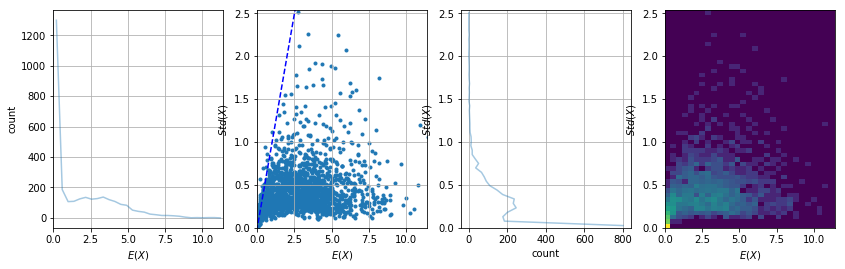

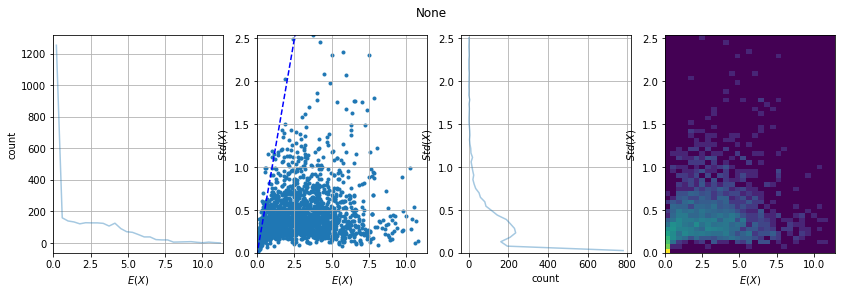

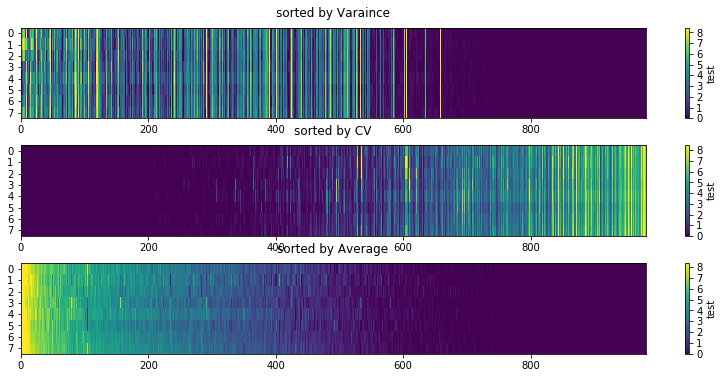

In [12]:
# dfc = scount.cournaseq_wt_sd
dfc = rnaseq_wt_sd
# dfc= dfc.dropna()
dfc= scount.countMatrix(dfc)
# dfc.heatmap()
sutil.qc_Avg(dfc,silent=0)
sutil.qc_Sort(df=dfc);


In [13]:
dfc.qc_Avg()
dfcc = dfc.reindex(dfc.summary.query('per > 0.9').index)

synotil/CountMatrix.py:326: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.summary = df


In [29]:
mdls = {}
for normF in [sutil.meanNorm,sutil.meanNormPCA]:
# normF= sutil.meanNorm
    tdf = normF(dfcc.copy()) 
    res = sutil.fit_BGM(tdf,nClu=30,random_state=0)
    mdls[normF] = res.name+'.npy'
# tdf.heatmap()

[ALI]= None
[qc_matrix]('Mean', -7.248322865521279e-18)=('Std', 1.0611202025496178)=('Shape', (3431, 8))
[MSG] Now Fitting Model:None_normF=meanNorm_covarianceType=diag_randomState=0_maxIt=1000_fixMean=0_genre=DPGMM_nClu=30_stdPer=0
[SUCC] to fit Model:None_normF=meanNorm_covarianceType=diag_randomState=0_maxIt=1000_fixMean=0_genre=DPGMM_nClu=30_stdPer=0

Name:test
Converged:True
min_logL: -1866.40094444
(lower-bound of) MEAN logL :-1866.40094444
[ALI]= None
[qc_matrix]('Mean', 1.242569634089362e-17)=('Std', 2.0658738724832184)=('Shape', (3431, 1))
[MSG] Now Fitting Model:None_normF=meanNormPCA_covarianceType=diag_randomState=0_maxIt=1000_fixMean=0_genre=DPGMM_nClu=30_stdPer=0
[SUCC] to fit Model:None_normF=meanNormPCA_covarianceType=diag_randomState=0_maxIt=1000_fixMean=0_genre=DPGMM_nClu=30_stdPer=0

Name:test
Converged:False
min_logL: -4046.15315292
(lower-bound of) MEAN logL :-4046.15315292


([<countMatrix: name=None_normF=meanNormPCA_covarianceType=diag_randomState=0_maxIt=1000_fixMean=0_genre=DPGMM_nClu=30_stdPer=0>,
  <countMatrix: name=None_normF=meanNorm_covarianceType=diag_randomState=0_maxIt=1000_fixMean=0_genre=DPGMM_nClu=30_stdPer=0>,
  <countMatrix: name=None>],
  <matplotlib.figure.Figure at 0x7fa9389dbb90>])

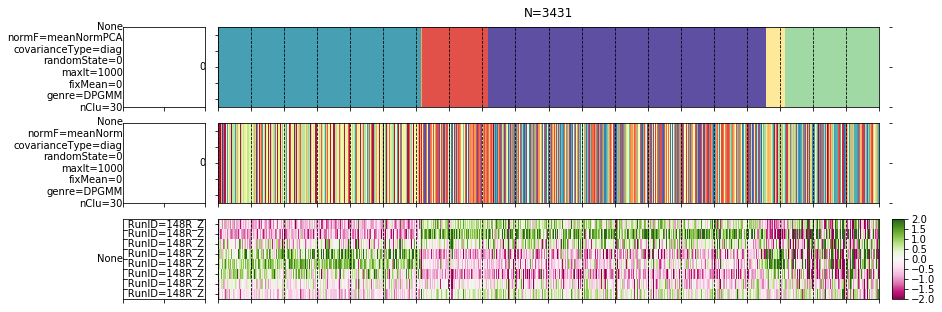

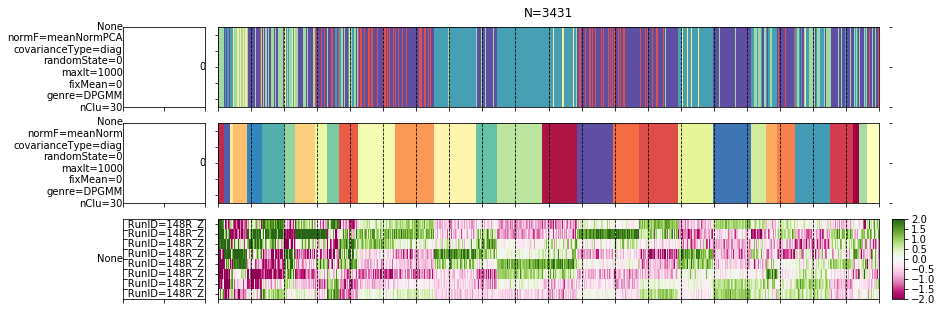

In [30]:
vdf = sutil.meanNorm(dfcc.copy())
vdf.vlim = [-2,2]
compClu  = sutil.make_compareClus([vdf])
res = {k:scount.countMatrix.from_npy(v) for k,v in mdls.items() }
clus = [x.predict() for x in res.values()]
compClu(clus)
# for k,v in res.items():
#     clu = v.predict()
    

In [33]:
!ln /home/shouldsee/repos/edward/notebooks/gmm.ipynb . 

By definition a Gaussian variable $m$ follows 

$$
P(m|\, \mu=0,\Sigma) = C \exp[-m^T \Sigma m]
$$

for equipotent surface $M = \{ m | P(m) = \exp [-E]\}$, the set is solved to be 

$$
m^T \Sigma m = E 
\\
(x\,, y ) \begin{pmatrix} a^{-2} & 0 \\ 0 & b^{-2}\end{pmatrix} 
\begin{pmatrix}
x \\ y
\end{pmatrix} = E 
\\
\frac{x^2}{a^2} + \frac{y^2}{b^2} = E
$$

one can shows that a uniform distribution on auxiliary variable $A(t) = (1\cdot c)$ satisfies the normalisation

$$\begin{align}
m &= (x,y) \\&= (a \cos t, b\sin t ) \\
\int_0^{2\pi} A( t) d t &= 1 \\
% L(M) = \int_0^{2\pi} \
\end{align}$$


it can be shown the angle 

$$
\theta =\tan ^{-1} \frac{y}{x}
\\
=\tan ^{-1}[\frac{b\sin t }{a \cos t } ]
\\
= \tan^{-1}[\frac{b}{a}\tan t]
$$ 
then follows distribution

$$
\int_0^{2\pi} \frac{x^2 + y^2 }{abz} d \theta  = 1 \\
\int_0^{2\pi} \frac{x^2 + y^2 }{Z} d \theta  = 1
$$